In [1]:
pip install smallworld-api

Note: you may need to restart the kernel to use updated packages.


In [83]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True  #< set this to False if you want PNGs instead of SVGs


choices: pd.DataFrame = SmallWorld.retrieve_databases()

len(choices.index)

print(choices)

                                                                     name  \
WuXi-20Q4.smi.anon                                         WuXi-20Q4-2.2B   
REAL_Space_21Q3_All_2B_public.smi.anon              REAL_Database_21Q3_2B   
all-zinc.smi.anon                              ZINC-All-2020Q2-1.46B.anon   
for-sale.smi.anon                                ZINC20-ForSale-22Q1-1.6B   
wait-ok.smi.anon                                 Wait-OK-2020Q2-1.2B.anon   
MculeUltimate-20Q2.smi.anon                       MculeUltimate_20Q2_126M   
instock.smi.anon                               In-Stock-2020Q2-13.8M.anon   
BBall.smi.anon                                   BB-All-2020Q2-26.7M.anon   
BBnow.smi.anon                                    BB-Now-2020Q2-1.6M.anon   
interesting.smi.anon                    ZINC-Interesting-2020Q2-300K.anon   

                                        numEntries   numMapped  numUnmapped  \
WuXi-20Q4.smi.anon                      2353582875  2275757656     778252

In [105]:
from rdkit import Chem
from rdkit.Chem import PandasTools
import pandas as pd  # for typehinting below

from smallworld_api import SmallWorld

query = 'CC1=CC=C(C=C1)C2=CC(=NN2C3=CC=C(C=C3)S(=O)(=O)N)C(F)(F)F'
sw = SmallWorld()
results : pd.DataFrame = sw.search(query, dist=5, db='REAL_Space_21Q3_All_2B_public.smi.anon', scores='ECFP4,Daylight', length='20000')

from IPython.display import display
#display(results)

C:\Anaconda3\lib\site-packages\smallworld_api\__init__.py:85: UserWarning: No completed return code returned: [{'status': 'FIRST', 'hlid': 21260, 'elap': '0.0 s', 'numEdges': 0, 'numNodes': 0, 'numWaveFront': 0, 'numEdgesPerSec': 'NaN'}, {'status': 'Ground Control to Major Tom', 'hlid': 21260, 'elap': '0.0 s', 'numEdges': 0, 'numNodes': 1, 'numWaveFront': 6, 'numEdgesPerSec': 0.0}, {'status': 'MORE', 'hlid': 21260, 'elap': '0.0 s', 'numEdges': 3, 'numNodes': 4, 'numWaveFront': 20, 'numEdgesPerSec': 742.2839582539501}, {'status': 'MORE', 'hlid': 21260, 'elap': '0.1 s', 'numEdges': 105, 'numNodes': 100, 'numWaveFront': 354, 'numEdgesPerSec': 948.7734018009182}, {'status': 'Ground Control to Major Tom', 'hlid': 21260, 'elap': '0.3 s', 'numEdges': 113, 'numNodes': 105, 'numWaveFront': 376, 'numEdgesPerSec': 448.26747398184176}, {'status': 'Ground Control to Major Tom', 'hlid': 21260, 'elap': '0.5 s', 'numEdges': 287, 'numNodes': 273, 'numWaveFront': 701, 'numEdgesPerSec': 570.4509848339345

In [106]:
x = results.iloc[:,[0]]
mol = Chem.MolFromSmiles(query)
mol

len(x)
print(x)

                                               hitSmiles
0      CC(C)(C)C1=CC=C(N2N=C(C(F)F)N=C2C3=COC(=O)C=C3...
1      CC(C)(C)C1=CC=C(N2N=C(C(F)F)N=C2C3=C[NH]C(=O)C...
2      CC(C)(C)C1=CC=C(N2N=C(C(F)F)N=C2C3=C[NH]C(=O)C...
3      CC(C)(C)C1=CC=C(N2N=C(C(F)F)N=C2C3=NC=C(F)C=N3...
4      CC(C)(C)C1=CC=C(N2N=C(C(F)F)N=C2C3=N[NH]C(=O)C...
...                                                  ...
13601  CC(C)(C)C1=CN(C(CCC(N)=O)C(=O)N2CCC(O)CC2)N=N1...
13602  CC(C)(C)C1=CN(C(CCC(N)=O)C(=O)N2CCS(=O)CC2)N=N...
13603  CC(C)(O)C1=CN(C(CCC(N)=O)C(=O)N2CCC(=O)CC2)N=N...
13604  CC(C)(O)C1=CN(C(CCC(N)=O)C(=O)N2CCC(F)CC2)N=N1...
13605  CC(C)(O)C1=CN(C(CCC(N)=O)C(=O)N2CCC(O)CC2)N=N1...

[13606 rows x 1 columns]


C:\Anaconda3\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:241: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


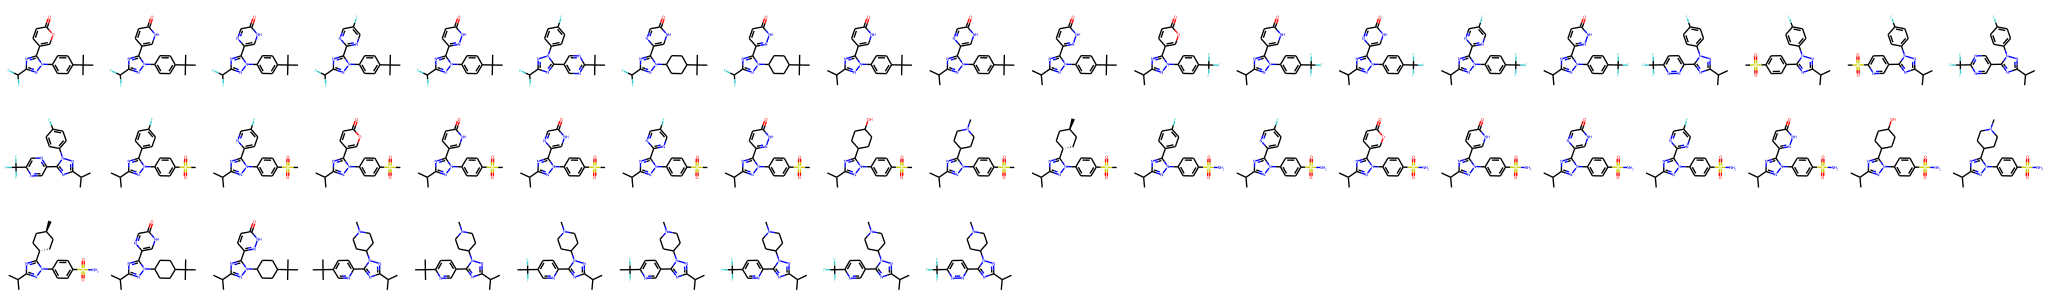

In [107]:
hitSmiles = x['hitSmiles'].str.split(" ", 1, expand=True)[0]

ms = [Chem.MolFromSmiles(x) for x in hitSmiles]
Draw.MolsToGridImage(ms,molsPerRow=20,subImgSize=(150, 150))
